In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.datasets import load_diabetes

In [2]:
data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
X = data.data
y = data.target

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
print("Relative Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Relative Mean Squared Error: 53.939675431257854
R^2 Score: 0.4373000617984171


In [27]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)

In [28]:
print("Relative Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_ridge_pred)))
print("R^2 Score:", r2_score(y_test, y_ridge_pred))

Relative Mean Squared Error: 53.931972138940814
R^2 Score: 0.43746077216807544


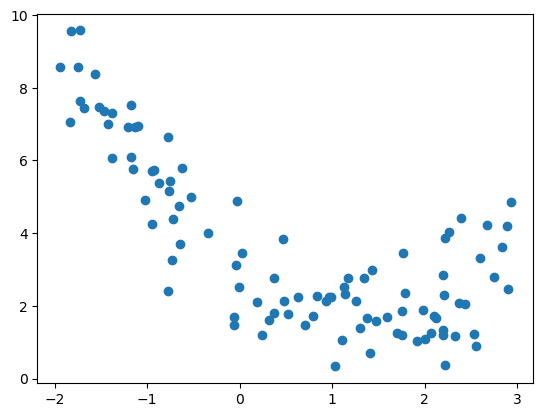

In [29]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

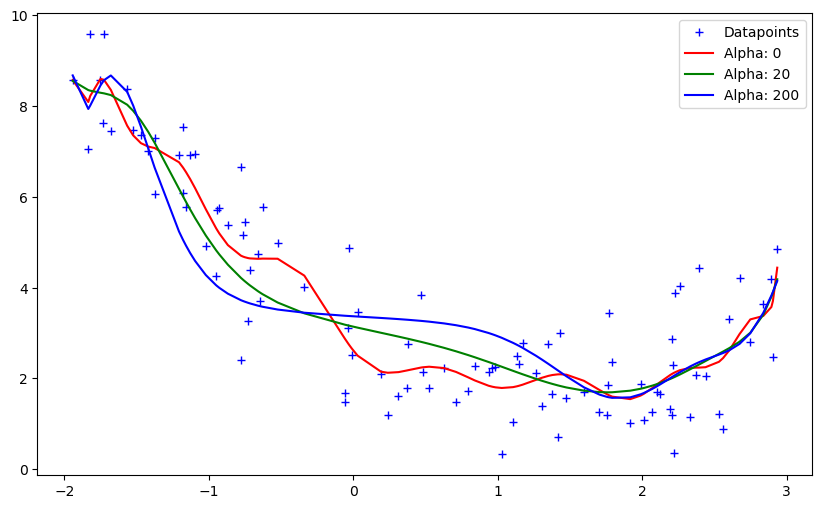

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [1]:
import numpy as np

# Parameters
initial_sip = 3000  # Starting monthly SIP in INR
step_up = 1000      # Increase every 6 months
period_years = 30
annual_return = 0.15

# Derived values
months = period_years * 12
monthly_return = (1 + annual_return) ** (1 / 12) - 1
step_up_interval = 6  # months

# Initialize total corpus
total_corpus = 0

# Simulate each SIP block
for start_month in range(0, months, step_up_interval):
    # SIP amount for this block
    sip_amount = initial_sip + (start_month // step_up_interval) * step_up
    # Number of months remaining from this block
    remaining_months = months - start_month
    # Future value of this SIP block using annuity formula
    fv = sip_amount * (((1 + monthly_return) ** remaining_months - 1) / monthly_return) * (1 + monthly_return)
    total_corpus += fv

total_corpus


1157933662.2352343